<a href="https://colab.research.google.com/github/Kalyan1902/DeepLearning/blob/main/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Setting the random seed for reproducibility
np.random.seed(42)

In [ ]:
# Define a step function for the perceptron activation
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

# Define a prediction function using the step function
def prediction(X, W, b):
    return stepFunction((np.matmul(X, W) + b)[0])

In [ ]:
# Define the perceptron step function to update weights and bias
def perceptronStep(X, y, W, b, learn_rate=0.01):
    for i in range(len(X)):
        yhat = prediction(X[i], W, b)
        if y[i] - yhat == 1:
            W[0] += X[i][0] * learn_rate
            W[1] += X[i][1] * learn_rate
            b += learn_rate
        elif y[i] - yhat == -1:
            W[0] -= X[i][0] * learn_rate
            W[1] -= X[i][1] * learn_rate
            b -= learn_rate
    return W, b


In [ ]:
# Function to train the perceptron algorithm and obtain weight changes
def trainPerceptronAlgorithm(X, y, learn_rate=0.01, num_epochs=60):
    # Initialize random weights and bias
    W = np.array(np.random.rand(2, 1))
    b = np.random.rand(1)[0]
    weight_changes = []  # Store weight changes for plotting

    # Iterate through epochs
    for i in range(num_epochs):
        # In each epoch, apply the perceptron step
        W, b = perceptronStep(X, y, W, b, learn_rate)
        # Store a copy of the weights
        weight_changes.append(np.copy(W))

    return weight_changes

In [ ]:
# Generate synthetic data for testing
X = np.array([[0.2, 0.8], [0.6, 0.1], [0.8, 0.9]])
y = np.array([0, 1, 1])

In [ ]:
# Train the perceptron algorithm and get weight changes
weight_changes = trainPerceptronAlgorithm(X, y)

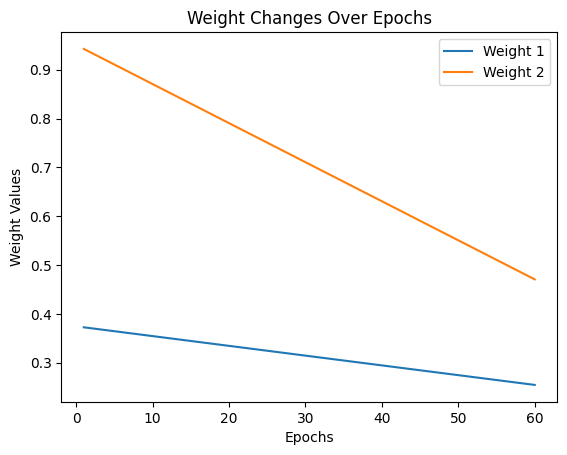

In [ ]:
# Plot the weight changes over epochs
weights_array = np.array(weight_changes)
plt.plot(range(1, weights_array.shape[0] + 1), weights_array[:, 0], label='Weight 1')
plt.plot(range(1, weights_array.shape[0] + 1), weights_array[:, 1], label='Weight 2')
# Add labels and legend to the plot
plt.title('Weight Changes Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Weight Values')
plt.legend()
plt.show()